# ÌïôÏäµ ÎÇ¥Ïö©
- 1.1 Pytorch Basic - ANN(Îã®Ï∏µ Î†àÏù¥Ïñ¥) <-----
- 1.2 Pytorch MNIST - ANN(Îã®Ï∏µ Î†àÏù¥Ïñ¥)
- 1.3 Pytorch MNIST - DNN(Îã§Ï∏µ Î†àÏù¥Ïñ¥)
- 1.4 Pytorch MNIST - ÎÇòÎßåÏùò Î™®Îç∏ ÎßåÎì§Í∏∞

# 1.1 Pytorch Basic - ANN Regression
 - Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî PytorchÎ•º Ïù¥Ïö©ÌïòÏó¨ 1Ï∞®Ìï®ÏàòÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Í≥†, ÌïôÏäµÌïòÏó¨ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïúÎã§.
 
 [Î™©Ï∞®]
 1.1.1 Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
 
 1.1.2 PyTorch Î™®Îç∏ÎßÅ
 
 1.1.3 Î™®Îç∏ ÌïôÏäµ + Ï∂îÏù¥ ÌôïÏù∏
 
 1.1.4 Î™®Îç∏ ÏÇ¨Ïö©ÌïòÍ∏∞
 
 1.1.5 Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ ÌôïÏù∏
 

### Ïó∞ÏÇ∞ÏûëÏóÖÏóê GPU ÏÇ¨Ïö© Í∞ÄÎä•Ïó¨Î∂Ä ÌôïÏù∏

In [2]:
# ÏΩîÎî© ÌÉÄÏûÑ(ÌÜ†ÏπòÏùò versionÍ≥º ÏÇ¨Ïö© Í∞ÄÎä•Ïó¨Î∂Ä ÌôïÏù∏)
import torch
print('torch version: {}'.format(torch.__version__))

if torch.cuda.is_available() == True:
    device = 'cuda:0'
    print('ÌòÑÏû¨ Í∞ÄÏÉÅÌôòÍ≤Ω GPU ÏÇ¨Ïö© Í∞ÄÎä•ÏÉÅÌÉú')
else:
    device = 'cpu'
    print('GPU ÏÇ¨Ïö© Î∂àÍ∞ÄÎä• ÏÉÅÌÉú')


##########

torch version: 2.0.0
GPU ÏÇ¨Ïö© Î∂àÍ∞ÄÎä• ÏÉÅÌÉú


In [3]:
def seed(seed = 1234):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed() # ÏãúÎìú Í≥†Ï†ï

## 1.1.1Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ

 - y = weight * x + bias
 - y = 4.56x + 7.89ÎùºÎäî ÏãùÏùÑ ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïóê ÌïôÏäµÏãúÌÇ®Îã§
 - 10,000Í∞úÏùò xÏôÄ yÏÑ∏Ìä∏Î•º [y = 4.56x + 7.89]Ïù¥ ÏÑ±Î¶ΩÌïòÍ≤å Ï†úÏûëÌïòÏó¨ Î™®Îç∏Ïóê ÌïôÏäµÏãúÌÇ§Î©∞ xÏôÄ yÏùò Í¥ÄÍ≥ÑÎ•º ÌïôÏäµÌïòÏó¨ weightÏôÄ biasÎ•º ÎßûÏ∂òÎã§

x: tensor([[0.2898],
        [4.0190],
        [2.5984],
        ...,
        [2.9740],
        [3.7569],
        [2.1046]])

y: tensor([[ 9.2115],
        [26.2166],
        [19.7389],
        ...,
        [21.4514],
        [25.0217],
        [17.4871]])



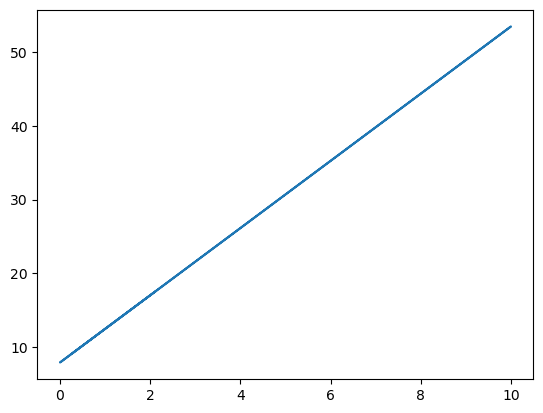

In [5]:
seed() # ÏãúÎìú Í≥†Ï†ï
# ÏΩîÎî© ÌÉÄÏûÑ(weightÏôÄ biasÎ•º ÏÑ†Ïñ∏ÌïòÍ≥†, xÏôÄ yÏùò ÏÑ∏Ìä∏Î•º ÎßåÎì§Í∏∞) - 1Î∂Ñ

gt_w = 4.56
gt_b = 7.89

x = torch.rand(10000, 1) * 10 # 0Í≥º 10 ÏÇ¨Ïù¥Ïùò Í∞í 10000Í∞úÎ•º ÎûúÎç§ÌïòÍ≤å ÎßåÎì†Îã§.
y = (gt_w * x) + gt_b

##########

print('x: {}\n'.format(x))
print('y: {}\n'.format(y))

import matplotlib.pyplot as plt
plt.plot(x,y)

## 1.1.2 Pytorch Î™®Îç∏ÎßÅ
 - Î™®Îç∏ ÏÑ†Ïñ∏: modelÏóê PytorchÏóêÏÑú Ï†úÍ≥µÌïòÎäî Linear ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
 - Loss Function: MSE ÏÇ¨Ïö©
 - ÏòµÌã∞ÎßàÏù¥Ï†Ä: SGDÎ•º ÏÇ¨Ïö©
 - Learning Rate: 0.01Î°ú ÏÑ§Ï†ï
 - Epochs = 3,000ÏúºÎ°ú ÏÑ§Ï†ï
 - Patience: 30Î≤àÏùò epoch Ïó∞ÏÜçÏúºÎ°ú Î™®Îç∏ ÌïôÏäµÏóê Î∞úÏ†ÑÏù¥ ÏóÜÏúºÎ©¥ ÌïôÏäµÏùÑ Ï§ëÏßÄ

### Î™®Îç∏ ÏÑ†Ïñ∏

In [6]:
seed() # ÏãúÎìú Í≥†Ï†ï

###PyTorchÎ°ú ÏÑ†Ïñ∏Ìïú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏!!###
model = torch.nn.Linear(in_features = 1, out_features = 1) 

import torch.optim as optim
criterion = torch.nn.MSELoss() # ÏÜêÏã§ Ìï®Ïàò
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) #ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º SGDÎ°ú ÏÑ§Ï†ïÌïòÍ≥†, Learning RateÎäî 0.01Î°ú ÏßÄÏ†ï

epochs = 3000 # ÏµúÎåÄ epochÎ•º ÏßÄÏ†ïÌïúÎã§(Early Stopping Í∏∞Îä•ÏúºÎ°ú Ïù∏Ìï¥ Ï§ëÍ∞ÑÏóê Î©àÏ∂§)
patience = 30 # Early StoppingÍ∏∞Îä•ÏúºÎ°ú ÏûëÎèôÌï† 'Ï∞∏ÏùÑÏÑ±' ÏÑ§Ï†ï. nÎ≤à Ïó∞ÏÜçÏúºÎ°ú ÌïôÏäµÏóê Î≥ÄÌôîÍ∞Ä ÏóÜÏúºÎ©¥ ÌïôÏäµÏùÑ Ï§ëÏßÄÌïúÎã§

### Î™®Îç∏ ÌïôÏäµ

In [7]:
seed() # ÏãúÎìú Í≥†Ï†ï
early_stop_cnt, weight_flag, bias_flag = 0, 0, 0 # early stoppingÏùÑ ÏúÑÌï¥ ÎπÑÍµêÎ°ú ÏÇ¨Ïö©ÎêòÎäî Î≥ÄÏàòÎì§ Ï¥àÍ∏∞Ìôî
losses = [] # ÌïôÏäµ Ï∂îÏù¥Ïóê ÏÇ¨Ïö©ÎêòÎäî Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî

for epoch in range(epochs + 1):
    
    # ÏΩîÎî©ÌÉÄÏûÑ(Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò Ï†úÏûë) - 3Î∂Ñ
    
    y_pred = model(x)
    loss = criterion(y_pred, y) # Ïã§Ï†ú yÏôÄ ÏòàÏ∏°Îêú yÏùò Ï∞®Ïù¥Î•º ÎπÑÍµêÌïòÏó¨ Loss ÏÇ∞Ï†ï
    losses.append(loss.item()) # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Îπà Î¶¨Ïä§Ìä∏Ïóê loss Ï∂îÍ∞Ä(item()ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏïàÏóê ÏûàÎäî Ïà´ÏûêÎßå Îì§Ïñ¥Í∞ê)
    optimizer.zero_grad() # Îß§ ÌïôÏäµÏãú ÎàÑÏ†ÅÎêú Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Ï¥àÍ∏∞Ìôî
    loss.backward() # lossÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú back propergationÏãúÌÇ®Îã§
    optimizer.step() # back propergationÏúºÎ°ú ÏïåÏïÑÎÇ∏ Í∞í Í∏∞Ï§ÄÏúºÎ°ú learning rateÎßåÌÅº ÎÇ¥Î†§Í∞ÑÎã§
    
    ##########
    
    w = float(model.weight[0][0]) # ÏòàÏ∏°Îêú weightÎ•º Ïã§ÏàòÎ°ú Ï∂îÏ∂ú
    b = float(model.bias[0]) # ÏòàÏ∏°Îêú biasÎ•º Ïã§ÏàòÎ°ú Ï∂îÏ∂ú
 
    # 1 epochÎßàÎã§ ÌïôÏäµÏùò Ï∂îÏù¥Î•º Ï∂úÎ†•ÌïòÎèÑÎ°ù
    print('Epoch: {:5} | Ground Truth Ïãù: y = {}x + {}  |  ÏòàÏ∏°Îêú Ïãù: y = {}x + {}\
    '.format(epoch, gt_w, gt_b, round(w, 4), round(b, 4)))
    
    # ÏßÅÏ†Ñ epochÏùò Í≤∞Í≥ºÏôÄ ÌòÑÏû¨ ÏòàÏ∏°Îêú Í≤∞Í≥ºÏùò ÎπÑÍµêÏóêÏÑú Î∞úÏ†ÑÏù¥ ÏûàÎäîÏßÄ ÌåêÎã®
    if w == weight_flag and b == bias_flag: 
        early_stop_cnt += 1
    else:
        early_stop_cnt = 0
    
    # Ïó∞ÏÜçÏ†ÅÏúºÎ°ú Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•Ïù¥ Í∞ôÏúºÎ©¥ early stoppingÏù¥ ÏûëÎèôÌïúÎã§
    if early_stop_cnt >= patience:
        print('Early StoppingÏù¥ ÏûëÎèôÎêòÏóàÏäµÎãàÎã§. ÌòÑÏû¨ epoch: {}'.format(epoch))
        break     
    
    # Îã§Ïùå epochÏóêÏÑú Î™®Îç∏Ïùò Î∞úÏ†ÑÏùÑ ÌåêÎã®ÌïòÍ∏∞ ÏúÑÌïòÏó¨ ÏòàÏ∏°Îêú weightÎûë bias Ï†ÄÏû•
    weight_flag = w
    bias_flag = b

Epoch:     0 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 3.5055x + 0.5143    
Epoch:     1 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.939x + 0.767    
Epoch:     2 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.3987x + 0.8717    
Epoch:     3 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.5437x + 0.9284    
Epoch:     4 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.5871x + 0.9695    
Epoch:     5 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.5977x + 1.0055    
Epoch:     6 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.5977x + 1.0396    
Epoch:     7 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.5943x + 1.0731    
Epoch:     8 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.5898x + 1.1063    
Epoch:     9 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 5.585x + 1.1393    
Epoch:    10 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú

Epoch:  1971 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1972 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1973 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1974 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1975 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1976 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1977 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1978 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1979 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1980 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°Îêú Ïãù: y = 4.5601x + 7.8895    
Epoch:  1981 | Ground Truth Ïãù: y = 4.56x + 7.89  |  ÏòàÏ∏°

## 1.1.3 Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞

- ÌïôÏäµ Í∑π Ï¥àÎ∞òÏóê Î°úÏä§Í∞Ä ÎÑàÎ¨¥ Ïª§ÏÑú, 1 epochÎ∂ÄÌÑ∞ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Î©¥ ÏãúÍ∞ÅÌôîÍ∞Ä Ï†úÎåÄÎ°ú ÏïàÎê®
- Îî∞ÎùºÏÑú 10 epochÎ∂ÄÌÑ∞ Î≥º Ïàò ÏûàÎèÑÎ°ù Ï°∞Í±¥ÏùÑ ÏàòÏ†ï

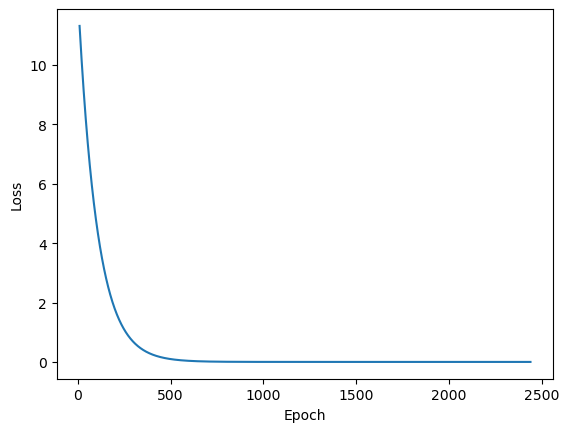

In [13]:
# ÏΩîÎî©ÌÉÄÏûÑ(ÌïôÏäµ Ï∂îÏù¥ ÌôïÏù∏ - epochÏóê Îî∞Î•∏ lossÎ•º Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†•) - 1Î∂Ñ
plt.plot(range(10, epoch+1, 1), losses[10:])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
##########

## 1.1.4 Î™®Îç∏ ÏÇ¨Ïö©ÌïòÍ∏∞
 - Î™®Îç∏ÏùÄ Í≥ÑÏÇ∞ÏãùÏùÑ Î™®Î•¥Í≥† xÏôÄ yÏùò Í¥ÄÍ≥ÑÎßå ÌïôÏäµÌñàÎäîÎç∞, ÎßûÎäî Í≤∞Í≥ºÎ•º ÎÇº Ïàò ÏûàÏùÑÍπå?


In [14]:
input = 123

# ÏΩîÎî© ÌÉÄÏûÑ(xÏóê 123ÏùÑ ÎÑ£Í≥† yÎ°ú Ïñ¥Îñ†Ìïú Í∞íÏù¥ ÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏) - 3Î∂Ñ

input = float(input) # Ïã§ÏàòÎ°ú Î≥ÄÍ≤Ω
input = [input] # Î¶¨Ïä§Ìä∏ ÏïàÏóê ÎÑ£Í∏∞
input = torch.tensor(input) # Tensor ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω

print('input Î™®Ïñë: {}'.format(input))

output = model(input) # Î™®Îç∏Ïóê ÎÑ£Í≥† Í≤∞Í≥ºÎ•º Ï∂úÎ†•
output = output.item() # Tensor ÌòïÏãùÏùò Í≤∞Í≥ºÏóêÏÑú Ïà´ÏûêÎßå Ï∂îÏ∂ú

ground_truth = input.item() * gt_w + gt_b
print('Ground Truth: {}'.format(ground_truth))
print('Predicted Y: {}'.format(output))

##########

input Î™®Ïñë: tensor([123.])
Ground Truth: 568.77
Predicted Y: 568.7709350585938


- Ïù∏Í≥µÏã†Í≤ΩÎßùÏóêÍ≤å ÏàòÏãùÏùÑ ÏïåÎ†§Ï£ºÏßÄ ÏïäÍ≥† Îã§ÎüâÏùò Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµÏãúÏºú Ï£ºÏóàÍ≥†
- lossÎ•º Ï§ÑÏù¥Îäî Î∞©Ìñ•ÏúºÎ°ú Ïó≠Ï†ÑÌåå ÌïôÏäµÏùÑ ÌÜµÌïòÏó¨ Ïó≠ÏúºÎ°ú ÏàòÏãùÏùò weightÏôÄ biasÎ•º ÎèÑÏ∂úÌïúÍ≤É Ï≤òÎüº Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¥
- ÎèÑÏ∂úÎêú ÏàòÏãùÏùÄ Ïã§Ï†ú Ï≤òÏùåÏóê ÏßÄÏ†ïÌïú ÏàòÏãùÏúºÎ°ú ÏàòÎ†¥Ìï®ÏùÑ Ïïå Ïàò ÏûàÏúºÎ©∞,
- ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞(Loss, Optimizer, Epoch, Early Stopping Patience, Learning Rate)Ï°∞Ï†ïÏùÑ ÌÜµÌïòÏó¨ Ï†ïÌôïÎèÑÎ•º Îçî Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÎã§

# ============================================================

- 1.1 Pytorch Basic - ANN(Îã®Ï∏µ Î†àÏù¥Ïñ¥)
- 1.2 Pytorch MNIST - ANN(Îã®Ï∏µ Î†àÏù¥Ïñ¥) <-----
- 1.3 Pytorch MNIST - DNN(Îã§Ï∏µ Î†àÏù¥Ïñ¥)
- 1.4 Pytorch MNIST - ÎÇòÎßåÏùò Î™®Îç∏ ÎßåÎì§Í∏∞

# 1.2 Pytorch MNIST - ANN(Îã®Ï∏µ Î†àÏù¥Ïñ¥)
 - Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî PytorchÎ•º Ïù¥Ïö©ÌïòÏó¨ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÍ≥† MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÎ•òÌïòÎèÑÎ°ù ÌïôÏäµÏãúÌÇ®Îã§.
 
 [Î™©Ï∞®]
 
 1.2.1 ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
 
 1.2.2 Batch Size ÏÑ§Ï†ï
 
 1.2.3 Îç∞Ïù¥ÌÑ∞ Î°úÎìú & Ï†ÑÏ≤òÎ¶¨
 
 1.2.4 Î™®Îç∏ ÏÑ†Ïñ∏
 
 1.2.5 ÌïôÏäµÏóê ÌïÑÏöîÌïú Í∏∞Îä• Ï†úÏûë
 
 1.2.6 Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ ÎèÑÏ∂ú

## 1.2.1 Batch Size ÏÑ§Ï†ï
- Îç∞Ïù¥ÌÑ∞Î•º Data LoaderÏóê ÎÑ£Ïñ¥Ï£ºÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ï†ÑÏóê Batch SizeÎ•º Ï†ïÌï¥Ï§ÄÎã§

In [15]:
# Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶à
batch_size = 32

## 1.2.2 Îç∞Ïù¥ÌÑ∞ Î°úÎìú & Ï†ÑÏ≤òÎ¶¨
- MNIST Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìú Î∞õÎäîÎã§.
- Train, Validation, test Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†Ìï¥Ï§ÄÎã§.

In [19]:
seed() # ÏãúÎìú Í≥†Ï†ï

import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torchvision import datasets
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(1.0,))])

# ÏΩîÎî© ÌÉÄÏûÑ(MNIST Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú ÌõÑ 3Î∂ÑÌï†) - 3Î∂Ñ

train_data = datasets.MNIST(root = './', train = True, download = True, transform = mnist_transform)
train_data, valid_data = random_split(train_data, [54000, 6000])
test_data = datasets.MNIST(root = './', train = False, download = True, transform = mnist_transform)

##########

## 1.2.3 Ï§ÄÎπÑÌïú Dataset Í∏∏Ïù¥ ÌôïÏù∏
- Train / Validation / Test Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÎåÄÎ°ú ÎÇòÎâòÏóàÎäîÏßÄ Í∏∏Ïù¥Î•º ÌôïÏù∏

In [20]:
print('Train Í∏∏Ïù¥: {}'.format(len(train_data)))
print('Valid Í∏∏Ïù¥: {}'.format(len(valid_data)))
print('Test  Í∏∏Ïù¥: {}'.format(len(test_data)))

Train Í∏∏Ïù¥: 54000
Valid Í∏∏Ïù¥: 6000
Test  Í∏∏Ïù¥: 10000


- Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌôïÏù∏ÌïúÎã§
- Ïà´Ïûê 0 ~ 9Î°ú Íµ¨ÏÑ±Îêú MNIST Îç∞Ïù¥ÌÑ∞Îäî 28 * 28 ÌîΩÏÖÄÎ°ú Ïù¥Î£®Ïñ¥Ï°åÎã§
- Í∞Å Îç∞Ïù¥ÌÑ∞ÎßàÎã§ ÎùºÎ≤®Ïù¥ Ï°¥Ïû¨ÌïúÎã§

Content of Y (Label, type = <class 'int'>) = 0
Shape of X(Data, type = <class 'torch.Tensor'> = torch.Size([1, 28, 28]))


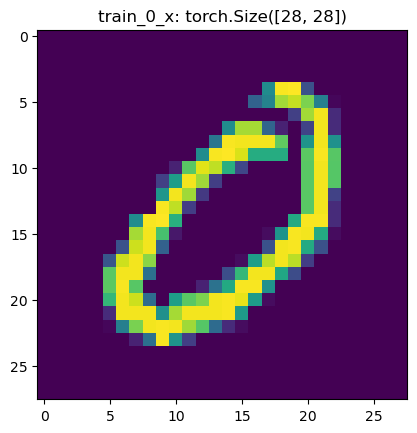

In [21]:
seed() # ÏãúÎìú Í≥†Ï†ï
train_0_x, train_0_y = train_data[1] # xÍ∞Ä ÏÇ¨ÏßÑ, yÎäî ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞
print('Content of Y (Label, type = {}) = {}'.format(type(train_0_y), train_0_y))
print('Shape of X(Data, type = {} = {})'.format(type(train_0_x), train_0_x.shape))

plt.figure(1)
plt.imshow(train_0_x.squeeze())
plt.title('train_0_x: {}'.format(train_0_x.squeeze().shape))
plt.show()

- Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º ÎßåÎì†Îã§
- Îç∞Ïù¥ÌÑ∞ Î°úÎçîÍ∞Ä ÏûàÏñ¥Ïïº Î™®Îç∏Ïóê Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£ÏùÑ Ïàò ÏûàÎã§
- Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º ÎßåÎì§Í≥†, Train Î∂ÄÎ∂ÑÏùÑ ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌôïÏù∏Ìï¥Î≥∏Îã§

In [22]:
seed() # ÏãúÎìú Í≥†Ï†ï
from torch.utils.data import DataLoader

# Train / Validation / Test ÏÖãÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÎßåÎì§Í∏∞
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, drop_last=True)
valid_loader = DataLoader(valid_data, batch_size=len(valid_data), pin_memory=True)
test_loader = DataLoader(test_data, batch_size=len(test_data), pin_memory=True)

# Train Î∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º ÌôïÏù∏ Ìï¥Î≥¥Í∏∞
train_enumerator = enumerate(train_loader) # train_loaderÏùò Í∞íÍ≥º ÏàúÏÑúÎ•º Ï∂îÏ∂ú

In [23]:
seed() # ÏãúÎìú Í≥†Ï†ï
ex_batch_idx, (ex_data, ex_label) = next(train_enumerator)

print('ÏàúÏÑú: / XÎ™®Ïñë: {} / YÎ™®Ïñë: {}'.format(ex_batch_idx, ex_data.shape, ex_label.shape))
print('Y 0 ~ {} Ï∂úÎ†•: {}'.format(batch_size, ex_label))

ÏàúÏÑú: / XÎ™®Ïñë: 0 / YÎ™®Ïñë: torch.Size([32, 1, 28, 28])
Y 0 ~ 32 Ï∂úÎ†•: tensor([5, 9, 7, 4, 5, 5, 7, 0, 6, 0, 7, 9, 3, 0, 8, 2, 5, 5, 0, 9, 3, 9, 7, 9,
        2, 1, 1, 8, 3, 3, 6, 5])


## 1.2.4 ÌïôÏäµÏóê ÌïÑÏöîÌïú Í∏∞Îä• Ï†úÏûë
- Î™®Îç∏ ÌïôÏäµÏóê ÌïÑÏöîÌïú Í∏∞Îä•Îì§(ÌïôÏäµ, ÏãúÍ∞ÅÌôî, Í≤∞Í≥º Î∂ÑÏÑù)Îì±ÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú Í∏∞Îä•Îì§ÏùÑ ÏÑ†Ïñ∏ÌïúÎã§

### Î™®Îç∏ ÏÑ†Ïñ∏
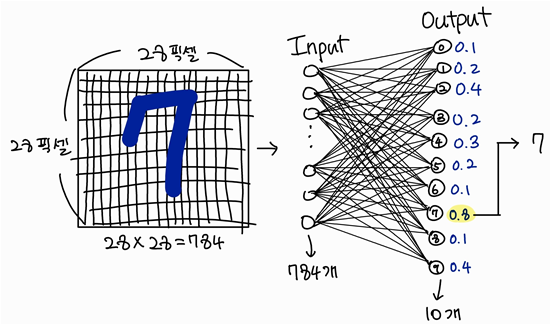

In [24]:
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞
maximum_epoch = 10 # ÏµúÎåÄ epoch
learning_rate = 0.01 # Learning Rate

import torch.nn as nn
class ANN(nn.Module):
    def __init__(self, in_features, out_features):
        super(ANN, self).__init__()
        
        # ÏΩîÎî© ÌÉÄÏûÑ(784Í∞úÏùò ÏûÖÎ†• -> 10Í∞úÏùò Ï∂úÎ†• Îã®Ï∏µ Î†àÏù¥Ïñ¥ Î°úÏßÅ ÎßåÎì§Í∏∞) - 3Î∂Ñ
        
        self.fc1 = nn.Linear(in_features, out_features) # ÏûÖÎ†• 784Í∞úÏùò Îâ¥Îü∞Ïù¥ 10Í∞úÎ°ú Î∂ÑÎ•òÎêúÎã§
        
        ##########
        
    def forward(self, x):
        # ÏΩîÎî© ÌÉÄÏûÑ(ÏúÑÏóêÏÑú ÎßåÎì† Î°úÏßÅÏùÑ forwardÎ°ú ÏÑ†Ïñ∏Ìï¥Ï£ºÍ∏∞) - ÏúÑÎûë Ìè¨Ìï®ÌïòÏó¨ 3Î∂Ñ
        
        x = self.fc1(x)
        
        ##########
        return x
    
# Model structure check
from torchsummary import summary as Summary
Summary(ANN(784, 10).to(device),(0, 0, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 0, 0, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


## ÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÎäî Ìï®Ïàò
 - Ï¥àÍ∏∞Ìôî
 - Î™®Îç∏ Íµ¨Îèô
 - ÌïôÏäµ Ï∂îÏù¥

### Ï¥àÍ∏∞Ìôî

In [25]:
# Model
from torch.optim import SGD
def init_model(_net):
    global net, loss_fn, optim # Î™®Îç∏, loss function, ÏòµÌã∞ÎßàÏù¥Ï†Ä Í∏ÄÎ°úÎ≤å Î≥ÄÏàòÎ°ú ÏÑ†Ïñ∏
    net = _net.to(device) # Î™®Îç∏ÏùÑ GPUÏóêÏÑú ÎèåÎ¶¥ Ïàò ÏûàÎèÑÎ°ù
    loss_fn = nn.CrossEntropyLoss() # Loss FunctionÏùÑ ÏÑ§Ï†ï
    optim = SGD(net.parameters(), lr=learning_rate) # ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ§Ï†ï

# Epoch
def init_epoch():
    global epoch_cnt
    epoch_cnt = 0
    
# Logging
def init_log():
    # Î™®Îì† LogÎ•º Ï¥àÍ∏∞Ìôî
    global log_stack, iter_log, tloss_log, tacc_log, vloss_log, vacc_log, time_log
    iter_log, tloss_log, tacc_log, vloss_log, vacc_log = [], [], [], [], []
    time_log, log_stack = [], []

### Î™®Îç∏ Íµ¨Îèô

In [26]:
import numpy as np
def epoch(data_loader):
    global epoch_cnt
    iter_loss, iter_acc = [], [] # ÌïôÏäµ Ï∂îÏù¥ Ï∂úÎ†•ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏ ÏÑ†Ïñ∏
    last_grad_performed = False # train ÏÉÅÌô©ÏóêÏÑúÎßå epoch Ïπ¥Ïö¥ÌÑ∞Î•º Ïò¨Î¶¨Í∏∞ ÏúÑÌïú flag

    # Mini-batch iterations
    for _data, _label in data_loader:
        data, label = _data.view([len(_data), -1]).to(device), _label.to(device)

# ÏΩîÎî© ÌÉÄÏûÑ(ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶ò 1 ~ 5 Ï±ÑÏõåÎ≥¥Í∏∞) - 3Î∂Ñ

        # 1. Feed-forward
        result = net(data) # 1 Î∞∞ÏπòÏóê ÎåÄÌïú Î™®Îì† class Î≥ÑÎ°úÏùò ÌôïÎ•†Í∞í
        _, out = torch.max(result, 1) # ÏúÑÏùò ÌôïÎ•†Í∞íÏóêÏÑú ÏµúÎåìÍ∞íÏùÑ ÎΩëÏïÑÏÑú ÏòàÏ∏°Îêú Ïà´ÏûêÎ°ú Î≥ÄÌôò

        # 2. Calculate loss
        loss = loss_fn(result, label) # Î™®Îç∏Ïùò ÏòàÏ∏°Í≥º GTÎ•º ÎπÑÍµêÌïòÏó¨ LossÎ•º ÏÇ∞Ï∂ú
        iter_loss.append(loss.item()) # ÏÇ∞Ï∂úÎêú LossÎ•º Í∏∞Î°ù

        # 3. Backward propagation(train mode ÏóêÏÑúÎßå)
        if result.requires_grad: # Validation Í≤ÄÏ¶ùÏùÑ Í±∞Ïπ† Îïå Ïó≠Ï†ÑÌåå ÌïôÏäµÏùÑ ÏïàÌïòÎèÑÎ°ù ifÎ¨∏ Ï°¥Ïû¨
            optim.zero_grad() # ÎØ∏Î∂ÑÏùÑ ÌÜµÌï¥ ÏñªÏùÄ Í∏∞Ïö∏Í∏∞Î•º Ï¥àÍ∏∞Ìôî. Í∑∏ÎûòÏïº Îã§Ïùå ÏóêÌè≠ÏóêÏÑú ÏÇ¨Ïö©
            loss.backward() # back PropagationÏùÑ ÏßÑÌñâ
            optim.step() # Í≤ΩÏÇ¨ ÌïòÍ∞ïÏùÑ ÏßÑÌñâ
            last_grad_performed = True # 1 epoch ÏôÑÎ£åÎê®ÏùÑ ÏïåÎ¶º
            
        # 4. Calculate accuracy
        acc_partial = (out == label).float().sum() # ÏòàÏ∏°Í∞íÏù¥Îûë GTÎûë Í∞ôÏùÄ Í∞úÏàòÎ•º Íµ¨Ìï®
        acc_partial = acc_partial / len(label) # [Í∞úÏàò / Ï¥ùÎüâ] ÏùÑ Ìï®ÏúºÎ°úÏÑú Ï†ïÌôïÎèÑÎ•º Íµ¨Ìï®
        iter_acc.append(acc_partial.item()) # ÏÇ∞Ï∂úÎêú Acc.Î•º Í∏∞Î°ù    
        
##########

    # 1 epochÏù¥ ÎÅùÎÇòÎ©¥ Ïπ¥Ïö¥ÌÑ∞Î•º 1Í∞ú Ïò¨Î†§Ï§ÄÎã§(trainÏóêÏÑúÎßå Ï†ÅÏö©)
    if last_grad_performed:
        epoch_cnt += 1

    return np.average(iter_loss), np.average(iter_acc) # Ïó¨Îü¨ iterationÏúºÎ°ú ÏåìÏù∏ LossÏôÄ Acc.Î•º ÌèâÍ∑†ÎÇ¥Ïñ¥ Î∞òÌôò

def epoch_not_finished():
    # ÏóêÌè≠Ïù¥ ÎÅùÎÇ®ÏùÑ ÏïåÎ¶¨Îäî Ìï®Ïàò
    return epoch_cnt < maximum_epoch

### ÌïôÏäµ Ï∂îÏù¥

In [27]:
def record_train_log(_tloss, _tacc, _time):
    # Train LogÎ•º Ï∂îÍ∞ÄÌï¥Ï§ÄÎã§
    time_log.append(_time)
    tloss_log.append(_tloss)
    tacc_log.append(_tacc)
    iter_log.append(epoch_cnt)

def record_valid_log(_vloss, _vacc):
    # Validation LogÎ•º Ï∂îÍ∞ÄÌï¥Ï§ÄÎã§
    vloss_log.append(_vloss)
    vacc_log.append(_vacc)

def last(log_list):
    # Î¶¨Ïä§Ìä∏ ÏïàÏùò ÎßàÏßÄÎßâ Ïà´ÏûêÎ•º Î∞òÌôò
    if len(log_list) > 0:
        return log_list[len(log_list) - 1]
    else:
        return -1

from IPython.display import clear_output
def print_log():    
    # Î°úÍ∑∏ ÌîÑÎ¶∞Ìä∏
    
    # ÏÜåÏà´Ï†ê 3ÏûêÎ¶¨ ÏàòÍπåÏßÄ Ï°∞Ï†à
    train_loss = round(last(tloss_log), 3)
    train_acc = round(last(tacc_log), 3)
    val_loss = round(last(vloss_log), 3)
    val_acc = round(last(vacc_log), 3)
    time_spent = round(last(time_log), 3)
    
    log_str = 'Epoch: {:3} | T_Loss {:5} | T_acc {:5} | V_Loss {:5} | V_acc. {:5} | \
üïí {:5}'.format(last(iter_log), train_loss, train_acc, val_loss, val_acc, time_spent)
    
    log_stack.append(log_str) # ÌîÑÎ¶∞Ìä∏Ìï† Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
    clear_output(wait=True) # Ï∂úÎ†•Î¨º Î™®Îëê Ï¥àÍ∏∞Ìôî
    
    for log_print in log_stack:
        print(log_print) # Îß§ ÏóêÌè≠ÎßàÎã§ Ï∂îÏù¥Î•º Ï∂úÎ†•

## 1.2.5 Î™®Îç∏ ÌïôÏäµ

In [28]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Training Initialization
init_model(ANN(len(train_0_x.view([-1])), 10)) # ÏûÖÎ†• 784Í∞ú, Ï∂úÎ†• 10Í∞ú
init_epoch() # ÏóêÌè≠Ïùò Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
init_log() # Î°úÍ∑∏ Îç∞Ïù¥ÌÑ∞ Ï¥àÍ∏∞Ìôî

losses_train, losses_val = [], [] # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ÏÑú Ï°¥Ïû¨

# Training Iteration
import time
while epoch_not_finished():
    start_time = time.time() # ÏãúÍ∞ÑÏ¥à ÏãúÏûë
    tloss, tacc = epoch(train_loader) # Î™®Îç∏Ïóê ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ìà¨ÏûÖ ÌõÑ loss, acc. Î∞òÌôò
    losses_train.append(tloss) # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
    end_time = time.time() # ÏãúÍ∞ÑÏ¥à Ï¢ÖÎ£å
    time_taken = end_time - start_time # ÌïôÏäµÏóê Í±∏Î¶∞ ÏãúÍ∞Ñ ÌôïÏù∏
    record_train_log(tloss, tacc, time_taken) # Ï∂îÏù¥ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
    with torch.no_grad(): # Ïó≠Ï†ÑÌåå ÌïôÏäµÏùÑ ÌïòÏßÄ ÎßêÎèÑÎ°ù
        vloss, vacc = epoch(valid_loader) # Validation Í≤ÄÏ¶ù ÏãúÍ∞Ñ
        losses_val.append(vloss) # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
        record_valid_log(vloss, vacc) # Ï∂îÏù¥ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
    print_log() # Î°úÍ∑∏Î•º ÌîÑÎ¶∞Ìä∏

print('\n Training completed!')

Epoch:   1 | T_Loss 0.783 | T_acc 0.824 | V_Loss 0.525 | V_acc. 0.861 | üïí 3.018
Epoch:   2 | T_Loss 0.455 | T_acc 0.881 | V_Loss 0.441 | V_acc. 0.878 | üïí 2.958
Epoch:   3 | T_Loss 0.402 | T_acc 0.891 | V_Loss 0.409 | V_acc. 0.884 | üïí 2.929
Epoch:   4 | T_Loss 0.375 | T_acc 0.897 | V_Loss 0.389 | V_acc. 0.886 | üïí  2.99
Epoch:   5 | T_Loss 0.358 | T_acc 0.901 | V_Loss 0.375 | V_acc. 0.891 | üïí 2.928
Epoch:   6 | T_Loss 0.347 | T_acc 0.903 | V_Loss 0.366 | V_acc. 0.893 | üïí 2.933
Epoch:   7 | T_Loss 0.338 | T_acc 0.906 | V_Loss 0.359 | V_acc. 0.896 | üïí 3.055
Epoch:   8 | T_Loss 0.331 | T_acc 0.907 | V_Loss 0.353 | V_acc. 0.898 | üïí 3.048
Epoch:   9 | T_Loss 0.325 | T_acc 0.909 | V_Loss 0.348 | V_acc. 0.899 | üïí 2.993
Epoch:  10 | T_Loss  0.32 | T_acc  0.91 | V_Loss 0.345 | V_acc. 0.901 | üïí 3.037

 Training completed!


### Train LossÏôÄ Validation LossÍ∞Ä ÌïôÏäµÏóê Îî∞Îùº Ï§ÑÏñ¥ÎìúÎäî Ï∂îÏù¥Î•º ÌôïÏù∏ÌïúÎã§
- ÏúÑ ÏÖÄÏóêÏÑú losses_trainÍ≥º losses_valÏù¥ÎùºÎäî Î¶¨Ïä§Ìä∏Ïóê lossÎì§ÏùÑ ÏåìÏïÑ ÎÜìÏïòÍ≥†, Ïù¥Î•º plotÏúºÎ°ú Í∑∏Î†§Î≥∏Îã§

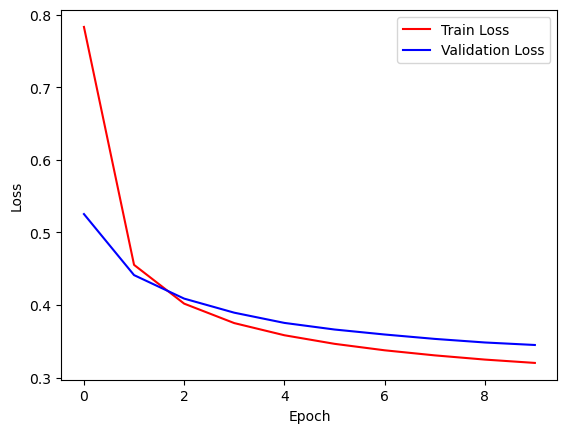

In [29]:
# ÏΩîÎî© ÌÉÄÏûÑ(plotÏúºÎ°ú TrainÍ≥º Validation lossÎ•º Ï∂úÎ†•ÌïòÍ∏∞

plt.plot(range(0, maximum_epoch, 1), losses_train, label = 'Train Loss', color = 'red')
plt.plot(range(0, maximum_epoch, 1), losses_val, label = 'Validation Loss', color = 'blue')

##########

plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

- epochÏù¥ Ï¶ùÍ∞ÄÌï† ÏàòÎ°ù train lossÏôÄ validation lossÍ∞Ä Í∞êÏÜåÌï®Í≥º ÎèôÏãúÏóê accuracyÍ∞Ä ÏÉÅÏäπÌï®ÏùÑ Ïïå Ïàò ÏûàÎã§
- Ï†ïÏÉÅÏ†ÅÏù∏ ÌïôÏäµ Î∞©ÏãùÏù¥Î©∞, lossÍ∞Ä ÎäòÏñ¥ÎÇòÍ±∞ÎÇò, accÍ∞Ä Í∞êÏÜåÌïòÎ©¥ Î™®Îç∏Ïùò Íµ¨Ï°∞ Î∞è ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Î≥ÄÍ≤ΩÌï¥Ïïº ÌïúÎã§


## 1.2.6 Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ ÎèÑÏ∂ú

In [30]:
# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc = epoch(test_loader)
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

Test Acc.: 0.9139
Test Loss: 0.3085


# ============================================================

- 1.1 Pytorch Basic - ANN(Îã®Ï∏µ Î†àÏù¥Ïñ¥)
- 1.2 Pytorch MNIST - ANN(Îã®Ï∏µ Î†àÏù¥Ïñ¥) 
- 1.3 Pytorch MNIST - DNN(Îã§Ï∏µ Î†àÏù¥Ïñ¥) <-----
- 1.4 Pytorch MNIST - ÎÇòÎßåÏùò Î™®Îç∏ ÎßåÎì§Í∏∞

# 1.3 Pytorch MNIST - MLP(Multi Layer Perceptron)
- Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†(MLP)ÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Ïù∏Í≥µÏã†Í≤ΩÎßù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÏó¨ MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÎ•òÌïòÎèÑÎ°ù ÌïôÏäµÏãúÌÇ®Îã§
- ÏïûÏóêÏÑú Î∞∞Ïö¥ Îã®Ï∏µ ÌçºÏÖâÌä∏Î°†(ANN)Í≥º Ïù¥Î≤à ÏãúÍ∞ÑÏóê Î∞∞Ïö¥ Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†(MLP)Ïùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥∏Îã§

## ÏÉàÎ°ú Î∞∞Ïö∞Îäî DNNÎ™®Îç∏(MLP)
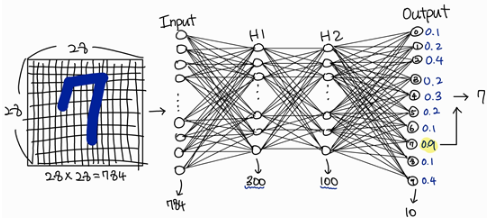

### Î™®Îç∏ ÏÑ†Ïñ∏
- Î™®Îç∏Ïùò ÌïôÏäµ Íµ¨Ï°∞Îäî Ïù¥ÎØ∏ Ïù¥Ï†ÑÏóê ÏÑ§Í≥ÑÌïòÏòÄÍ≥†, Î™®Îç∏Ïùò ÏïÑÌÇ§ÌÖçÏ≥êÎßå Î∞îÍæ∏Ïñ¥ ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† ÌïôÏäµÏù¥ Í∞ÄÎä•ÌïòÎã§

In [31]:
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞
maximum_epoch = 10 # ÏµúÎåÄ epoch
learning_rate = 0.01 # Learning Rate

class MLP(nn.Module):
    def __init__(self, in_features, out_features):
        super(MLP, self).__init__()
        layer = [300, 100]
        
        # 784 -> 300 -> 100 -> 10
        self.fc1 = nn.Linear(in_features, layer[0])
        self.act1 = nn.ReLU() # ÏÇ¨Ïö©ÎêòÎäî Activation FunctionÏùÄ ReluÏù¥Îã§
        self.fc2 = nn.Linear(layer[0], layer[1])
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(layer[1], out_features)

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.fc3(x)
        return x

# Model structure check
from torchsummary import summary as Summary
Summary(MLP(784, 10).to(device),(0, 0, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 0, 0, 300]         235,500
              ReLU-2            [-1, 0, 0, 300]               0
            Linear-3            [-1, 0, 0, 100]          30,100
              ReLU-4            [-1, 0, 0, 100]               0
            Linear-5             [-1, 0, 0, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.02
Estimated Total Size (MB): 1.02
----------------------------------------------------------------


### Î™®Îç∏ ÌïôÏäµ

In [32]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Training Initialization
init_model(MLP(len(train_0_x.view([-1])), 10)) # ÏûÖÎ†• 784Í∞ú, Ï∂úÎ†• 10Í∞ú
init_epoch() # ÏóêÌè≠Ïùò Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
init_log() # Î°úÍ∑∏ Îç∞Ïù¥ÌÑ∞ Ï¥àÍ∏∞Ìôî

losses_train, losses_val = [], [] # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ÏÑú Ï°¥Ïû¨

# Training Iteration
while epoch_not_finished():
    start_time = time.time() # ÏãúÍ∞ÑÏ¥à ÏãúÏûë
    tloss, tacc = epoch(train_loader) # Î™®Îç∏Ïóê ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ìà¨ÏûÖ ÌõÑ loss, acc. Î∞òÌôò
    losses_train.append(tloss) # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
    end_time = time.time() # ÏãúÍ∞ÑÏ¥à Ï¢ÖÎ£å
    time_taken = end_time - start_time # ÌïôÏäµÏóê Í±∏Î¶∞ ÏãúÍ∞Ñ ÌôïÏù∏
    record_train_log(tloss, tacc, time_taken) # Ï∂îÏù¥ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
    with torch.no_grad(): # Ïó≠Ï†ÑÌåå ÌïôÏäµÏùÑ ÌïòÏßÄ ÎßêÎèÑÎ°ù
        vloss, vacc = epoch(valid_loader) # Validation Í≤ÄÏ¶ù ÏãúÍ∞Ñ
        losses_val.append(vloss) # ÎÇòÏ§ëÏóê Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
        record_valid_log(vloss, vacc) # Ï∂îÏù¥ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
    print_log() # Î°úÍ∑∏Î•º ÌîÑÎ¶∞Ìä∏

print('\n Training completed!')

# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc = epoch(test_loader)
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

Epoch:   1 | T_Loss  1.12 | T_acc 0.699 | V_Loss 0.495 | V_acc.  0.85 | üïí 3.594
Epoch:   2 | T_Loss 0.391 | T_acc 0.887 | V_Loss 0.368 | V_acc. 0.892 | üïí 3.562
Epoch:   3 | T_Loss 0.325 | T_acc 0.906 | V_Loss 0.328 | V_acc. 0.904 | üïí  3.78
Epoch:   4 | T_Loss 0.289 | T_acc 0.915 | V_Loss 0.293 | V_acc. 0.914 | üïí 3.848
Epoch:   5 | T_Loss  0.26 | T_acc 0.923 | V_Loss 0.269 | V_acc. 0.921 | üïí 3.989
Epoch:   6 | T_Loss 0.237 | T_acc  0.93 | V_Loss 0.257 | V_acc. 0.925 | üïí 4.027
Epoch:   7 | T_Loss 0.215 | T_acc 0.938 | V_Loss 0.242 | V_acc. 0.928 | üïí 4.007
Epoch:   8 | T_Loss 0.197 | T_acc 0.944 | V_Loss  0.22 | V_acc. 0.934 | üïí 3.732
Epoch:   9 | T_Loss  0.18 | T_acc 0.948 | V_Loss 0.203 | V_acc. 0.941 | üïí 3.682
Epoch:  10 | T_Loss 0.165 | T_acc 0.952 | V_Loss 0.193 | V_acc. 0.943 | üïí 3.526

 Training completed!
Test Acc.: 0.9503
Test Loss: 0.1648


### Î™®Îç∏ Ï†ÄÏû•ÌïòÍ≥† Î∂àÎü¨Ïò§Í∏∞

In [33]:
# ÏΩîÎî©ÌÉÄÏûÑ(Î™®Îç∏ Ï†ÄÏû•ÌïòÍ∏∞) - 1Î∂Ñ

torch.save(net.state_dict(), './model.pth') # Î™®Îç∏ Ï†ÄÏû•

##########

In [34]:
# ÏΩîÎî©ÌÉÄÏûÑ(Ï†ÄÏû•Ìïú Î™®Îç∏ÏùÑ Î°úÎìú ÌïòÍ∏∞)

net = MLP(in_features = 784, out_features = 10).to(device)
net.load_state_dict(torch.load('./model.pth'))


##########

<All keys matched successfully>

## ANNÍ≥º DNNÏùò ÏÑ±Îä• ÎπÑÍµê & ÏÉùÍ∞ÅÌï¥Î≥¥Í∏∞
- Îã®Ï∏µ Î†àÏù¥Ïñ¥ Î™®Îç∏Í≥º Îã§Ï∏µ Î†àÏù¥Ïñ¥ Î™®Îç∏Ïùò ÏÑ±Îä• ÎπÑÍµêÏãú Îã§Ï∏µ Î†àÏù¥Ïñ¥(MLP)Í∞Ä Îçî Ïö∞ÏàòÌïòÎã§


- Hidden LayerÏàòÎ•º Î¨¥ÏûëÏ†ï ÎßéÏù¥ ÎäòÎ¶¨Î©¥ ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÏïÑÏßàÍπå?
- Hidden LayerÍ∞Ä ÏßÄÎÇòÏπòÍ≤å ÎßéÏúºÎ©¥ Ïó∞ÏÇ∞ÎüâÏù¥ ÎÑàÎ¨¥ ÎßéÏïÑÏßÄÏßÄÎäî ÏïäÏùÑÍπå?
- Î™®Îç∏Ïù¥ ÏµúÍ≥†Ïùò ÏÑ±Îä•ÏùÑ ÎÇ¥Î†§Î©¥ Ïñ¥ÎñªÍ≤å Ìï¥Ïïº Ìï†Íπå?

# ======================================================